In [3]:
import sys; sys.path.append("../../wwa"); from wwa import *

def synth_plot(df, ax = None, logged = False, split_uw = False):
    
    # set split_uw = True to plot the unweighted mean of obs and models on its own line
    if not ax: fig, ax = plt.subplots(dpi = 100)
    
    gcols = {"obs" : "blue", 
             "obs_synth" : "blue", 
             "models" : "red", 
             "model_synth" : "red",
             "synth" : "magenta",
             "synth_uw" : "lightgrey"}
    
    ylabels = df.model.to_list()
    
    ax.grid(axis = "x", which = "major", color = "k", alpha = 0.1)
    
    if logged:
        ax.set_xscale('log')
        ax.axvline(1, ls = "--", color = "k", zorder = -99)
    else:
        ax.axvline(0, ls = "--", color = "k", zorder = -99)
    
    for k in range(len(df)):

        r = df.iloc[k]
        ax.add_patch(Rectangle((r.lower,-k-0.4), r.upper - r.lower, 0.8, facecolor = gcols[r.name], alpha = 0.5 + 0.5*("synth" in r.name)))
        ax.plot(r.est, -k, color = "k", marker = "v")
        ax.add_patch(Rectangle((r.l_wb,-k-0.4), r.u_wb - r.l_wb, 0.8, edgecolor = "k", facecolor = "none", lw = 1.5))

    ax.set_yticks(range(0, -len(ylabels), -1))
    ax.set_yticklabels(ylabels)

In [27]:
varnm = "tx14x"
period = "attr"
models = "cmip6-only"
obs = "_era-eobs"

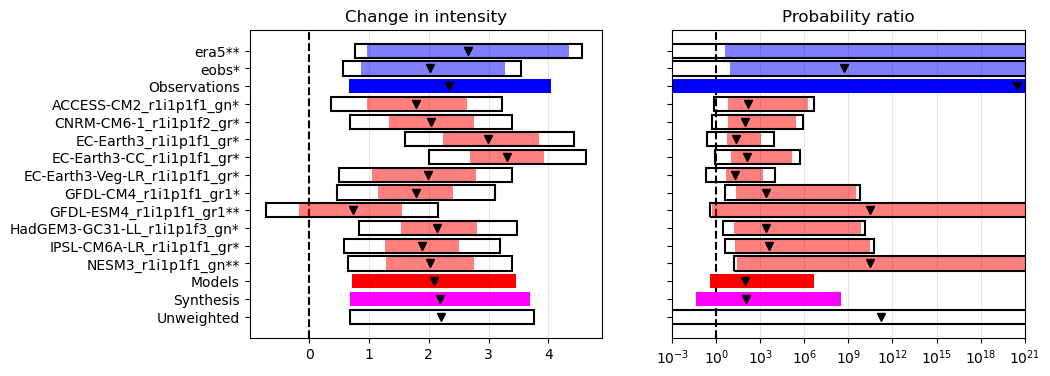

In [28]:
synth_attr_dI = pd.read_csv("synthesis/synth_dI-"+period+"_"+varnm+"_"+models+obs+".csv", index_col = "group")
synth_attr_PR = pd.read_csv("synthesis/synth_PR-"+period+"_"+varnm+"_"+models+obs+".csv", index_col = "group")

xlim_pr = {"tx14x-attr" : (10e-4, 10e20)}

fig, axs = plt.subplots(ncols = 2, sharey = True, figsize = (10,len(synth_attr_dI)*0.25))
plt.subplots_adjust(hspace = 0.1)

synth_plot(synth_attr_dI, ax = axs[0])
axs[0].set_title("Change in intensity")

synth_plot(synth_attr_PR, ax = axs[1], logged = True)
axs[1].set_title("Probability ratio")
# plt.suptitle("Synthesised changes in "+varnm+" ("+{"attr" : "Past-present", "proj" : "Present-future"}[period]+")")

if varnm+"-"+period in xlim_pr.keys():
    axs[1].set_xlim(xlim_pr[varnm+"-"+period])

plt.savefig("fig/synth-plot_"+period+"_"+varnm+"_"+models+obs)